# Classification of patients with chronic kidney disease (ckd) using ANN

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from sklearn.model_selection import train_test_split
import keras as k
from keras.models import Sequential, load_model
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

### Loading data

In [3]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("kidney_disease.csv")


df.head()

Saving kidney_disease.csv to kidney_disease.csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 26)

### Cleaning the data

In [5]:
# Removing unnecessary data
columns_to_retain = ["sg", "al", "sc", "hemo", "pcv", "wbcc", "rbcc", "htn", "classification"]

df.drop([x for x in df.columns if x not in columns_to_retain], axis=1, inplace=True)

In [6]:
df.columns

Index(['sg', 'al', 'sc', 'hemo', 'pcv', 'htn', 'classification'], dtype='object')

In [8]:
#Dropping na values
df = df.dropna(axis = 0)

In [9]:
# Now, looping through all df columns and find those columns that do not contain numbers and convert them to numbers.

for cols in df.columns:
  if df[cols].dtype != np.number:
    df[cols] = LabelEncoder().fit_transform(df[cols])
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  after removing the cwd from sys.path.


In [10]:
df.head()

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


### Splitting the data into Features and Labels

In [12]:
X = df.drop(["classification"], axis = 1)
y = df["classification"]

In [14]:
X

,sg,al,sc,hemo,pcv,htn
0,1.020,1.0,1.2,15.4,28,1
1,1.020,4.0,0.8,11.3,22,0
2,1.010,2.0,1.8,9.6,15,0
3,1.005,4.0,3.8,11.2,16,1
4,1.010,2.0,1.4,11.6,19,0
...,...,...,...,...,...,...
395,1.020,0.0,0.5,15.7,31,0
396,1.025,0.0,1.2,16.5,38,0
397,1.020,0.0,0.6,15.8,33,0
398,1.025,0.0,1.0,14.2,35,0


### Feature Scaling

In [15]:
scaler = MinMaxScaler()
scaler.fit(X)
column_names = X.columns
X[column_names] = scaler.transform(X)

In [17]:
X

,sg,al,sc,hemo,pcv,htn
0,0.75,0.2,0.033898,0.836735,0.717949,1.0
1,0.75,0.8,0.016949,0.557823,0.564103,0.0
2,0.25,0.4,0.059322,0.442177,0.384615,0.0
3,0.00,0.8,0.144068,0.551020,0.410256,1.0
4,0.25,0.4,0.042373,0.578231,0.487179,0.0
...,...,...,...,...,...,...
395,0.75,0.0,0.004237,0.857143,0.794872,0.0
396,1.00,0.0,0.033898,0.911565,0.974359,0.0
397,0.75,0.0,0.008475,0.863946,0.846154,0.0
398,1.00,0.0,0.025424,0.755102,0.897436,0.0


### Splitting the data set into train and test

In [19]:
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, shuffle=True)

## Constructing and compiling a Model

In [21]:
model = Sequential()
model.add(Dense(256, input_dim=len(X.columns),
kernel_initializer=k.initializers.random_normal(seed=10), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))

In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


### Training the model

In [23]:
history = model.fit(X_train, y_train,  epochs=2000, batch_size=X_train.shape[0]) 

Epoch 1/2000
1/1 [==============================] - 14s 14s/step - loss: 0.6888 - accuracy: 0.5109
Epoch 2/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6825 - accuracy: 0.5459
Epoch 3/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6763 - accuracy: 0.6594
Epoch 4/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6702 - accuracy: 0.6943
Epoch 5/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6642 - accuracy: 0.7598
Epoch 6/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6584 - accuracy: 0.7904
Epoch 7/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6525 - accuracy: 0.8079
Epoch 8/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6468 - accuracy: 0.8166
Epoch 9/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6411 - accuracy: 0.8253
Epoch 10/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6355 - accuracy: 0.8384
Epoch 11/2000
1/1 

In [24]:
#Save the model
model.save("final.model")

INFO:tensorflow:Assets written to: final.model/assets


### Trends

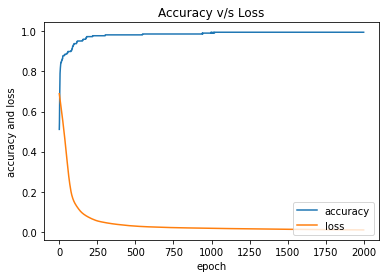

In [28]:
#Visualize the models accuracy and loss
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("Accuracy v/s Loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['accuracy', 'loss'], loc='lower right')
plt.show()

## Testing the model

In [29]:
for model_file in glob.glob("*.model"):
  print("Model file: ", model_file)
  model = load_model(model_file)
  pred = model.predict(X_test)
  pred = [1 if y>=0.5 else 0 for y in pred]  
  scores = model.evaluate(X_test, y_test)
  print()
  print("Original  : {0}".format(", ".join([str(x) for x in y_test])))
  print()
  print("Predicted : {0}".format(", ".join([str(x) for x in pred])))
  print() 
  print("Scores    : loss = ", scores[0], " acc = ", scores[1])
  print("---------------------------------------------------------")
  print()


Model file:  final.model
2/2 [==============================] - 0s 5ms/step - loss: 6.1593e-04 - accuracy: 1.0000

Original  : 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1

Predicted : 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1

Scores    : loss =  0.0006159299518913031  acc =  1.0
---------------------------------------------------------

